In [1]:
import compnal
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [2]:
degree = 4
J = -1.0
x_size = 30
y_size = 30

In [3]:
lattice = compnal.lattice.Square(
    x_size=x_size,
    y_size=y_size,
    boundary_condition=compnal.lattice.BoundaryCondition.PBC
)
model = compnal.model.PolynomialIsing(
    lattice=lattice, interaction={degree: J}
)
solver = compnal.solver.ClassicalMonteCarlo(
    model=model, 
    updater=compnal.solver.Updater.METROPOLIS
)
solver.num_sweeps = 10000
solver.num_samples = 1000
solver.num_threads = 8
solver.temperature = 0.5

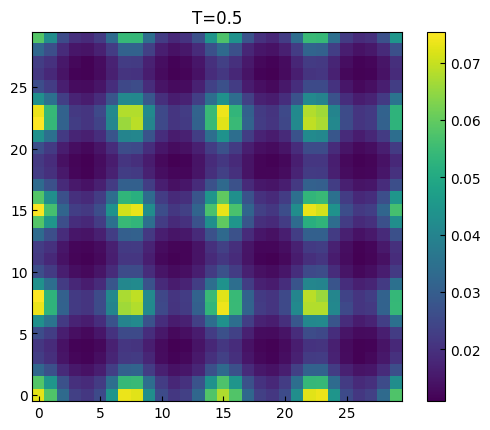

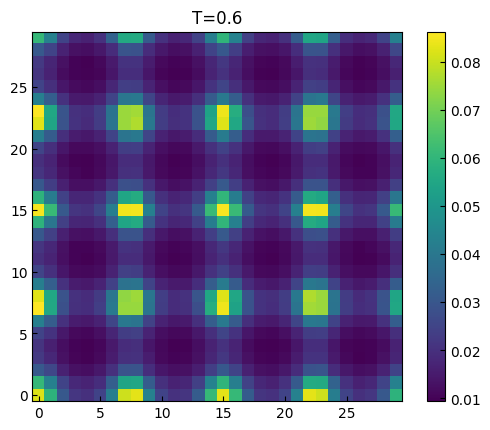

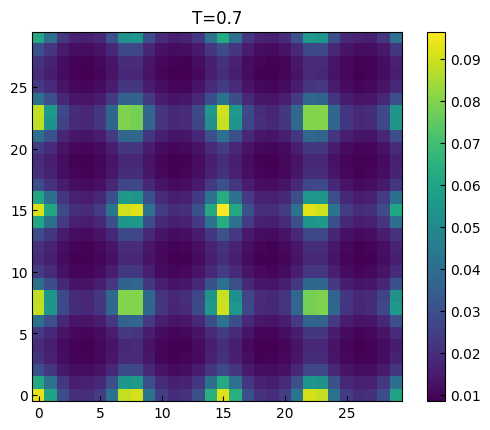

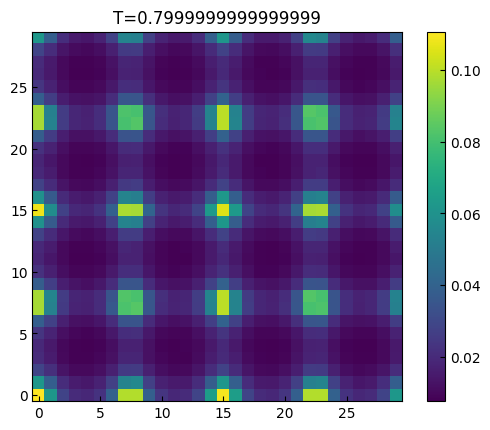

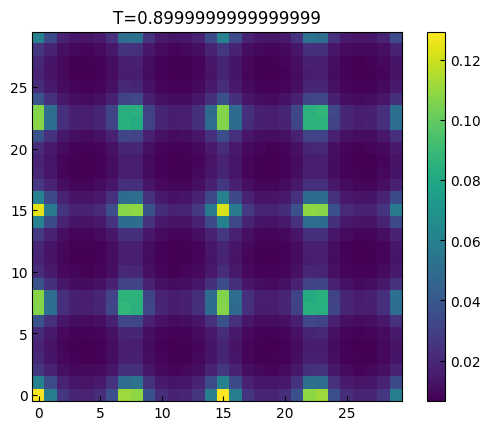

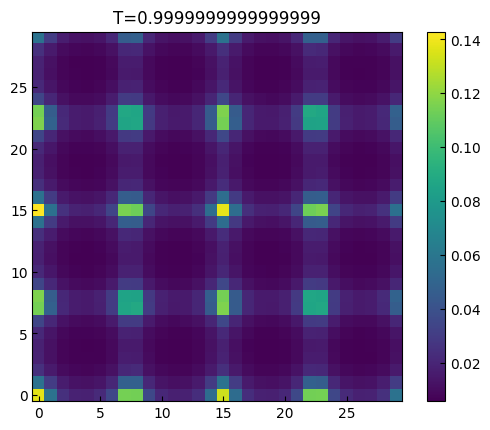

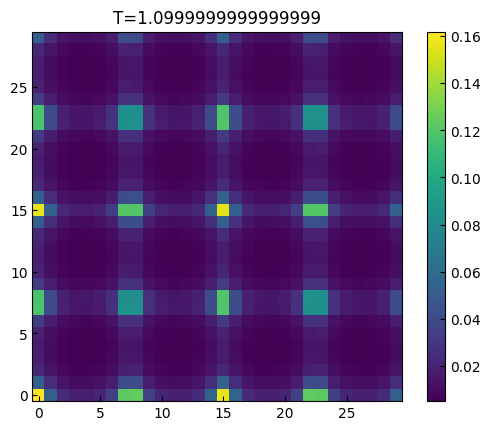

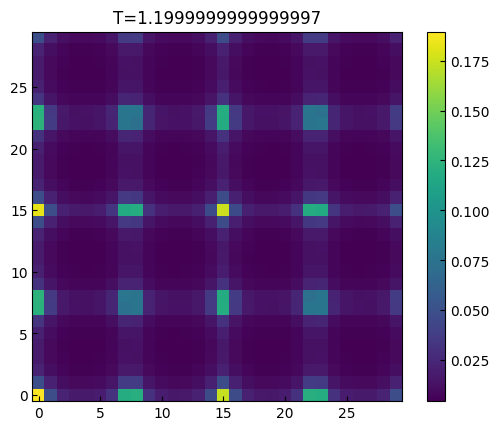

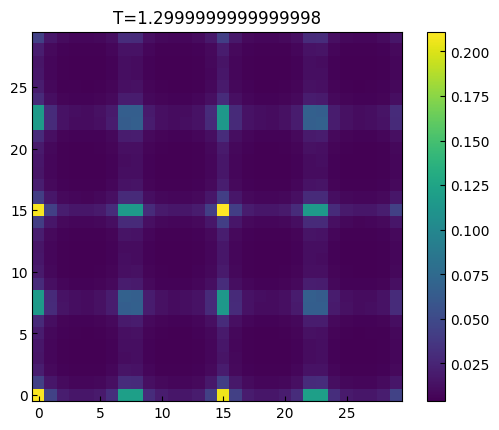

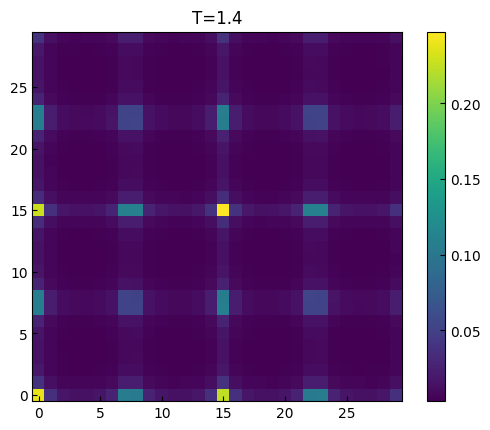

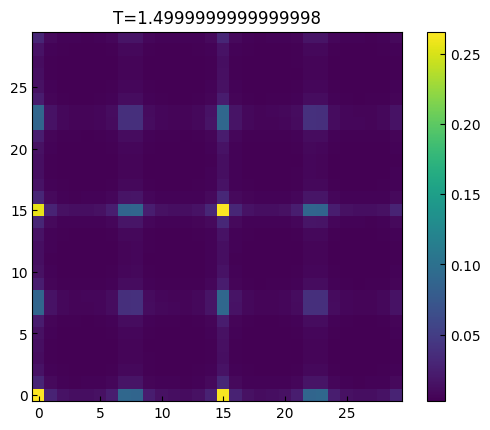

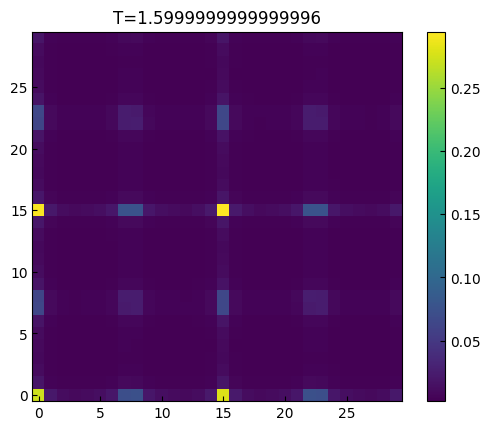

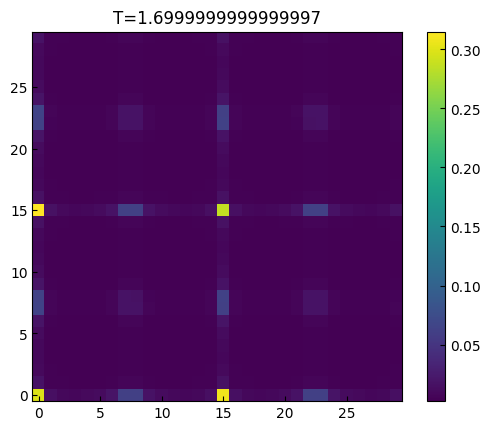

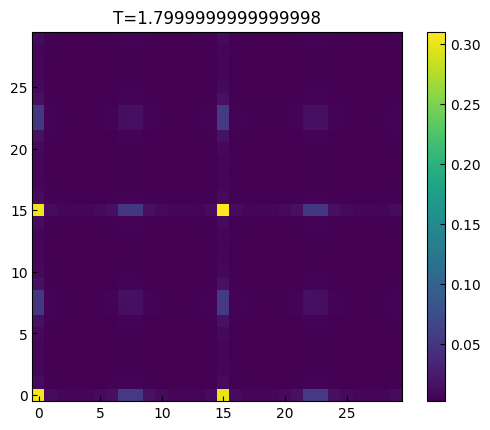

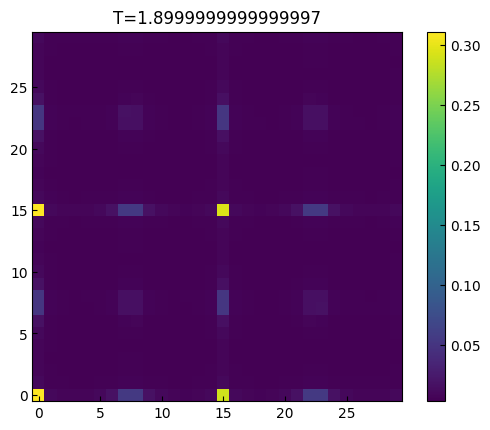

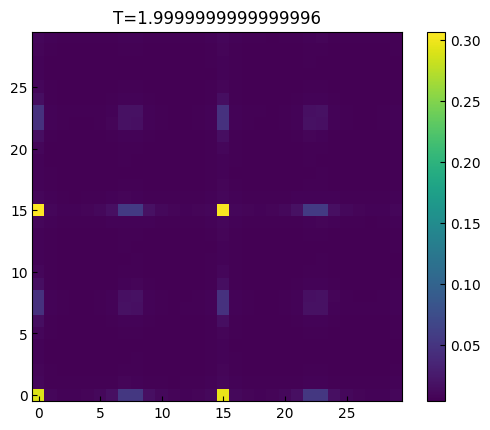

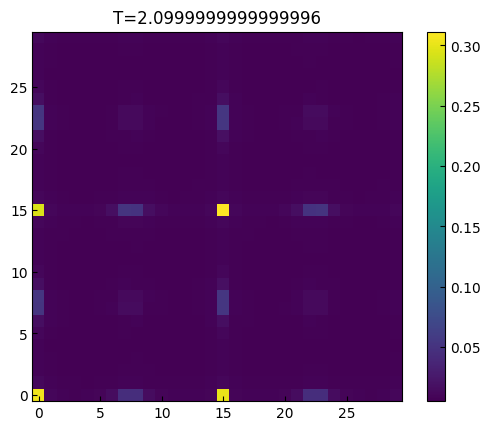

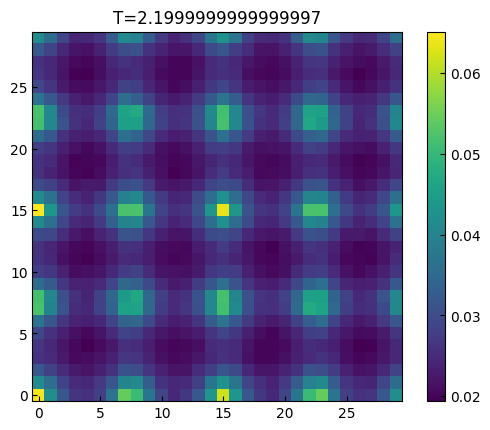

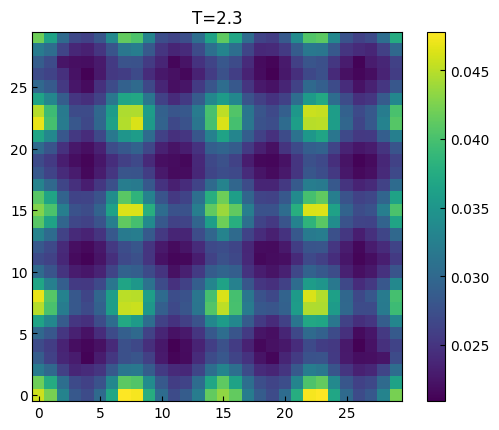

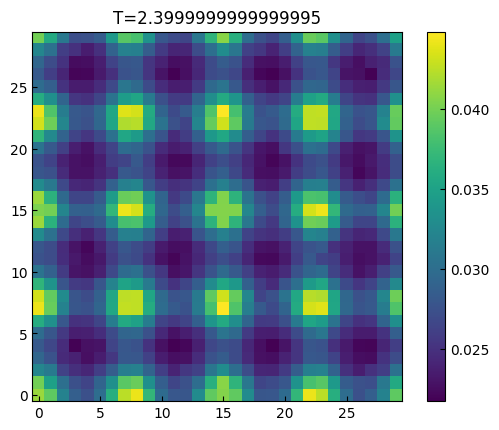

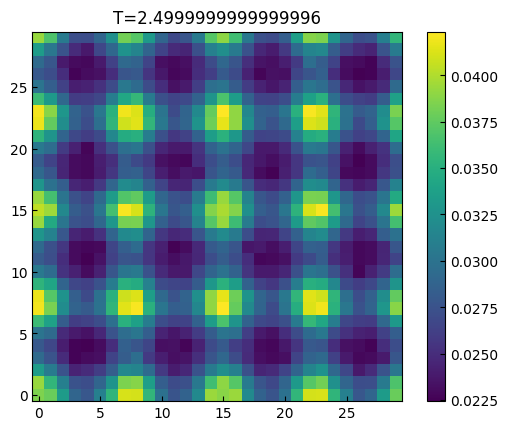

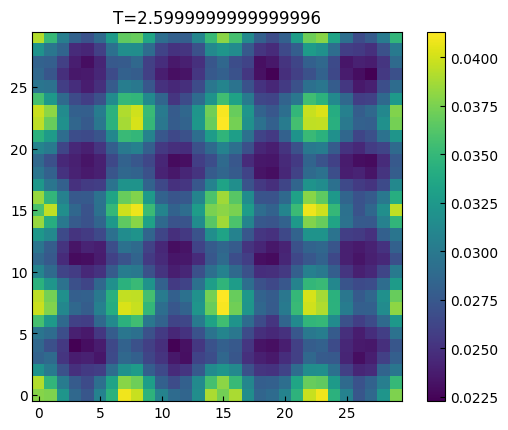

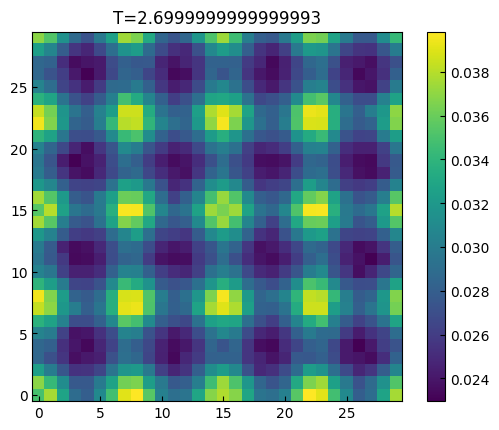

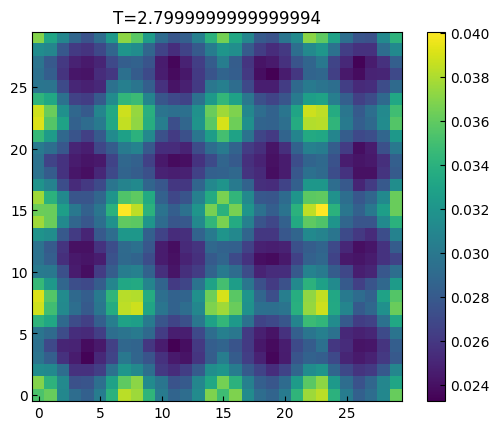

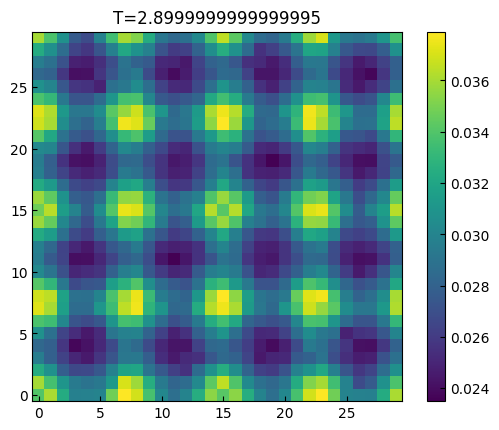

In [4]:
for t in np.arange(0.5, 3.0, 0.1):
    solver.temperature = t
    solver.run()
    f = np.zeros((model.lattice.x_size, model.lattice.y_size))
    for index in range(solver.num_samples):
        shaped_sample = np.reshape(solver.get_samples()[index], (model.lattice.x_size, model.lattice.y_size))
        f += np.abs(np.fft.fft2(shaped_sample))/model.system_size
    f = f/solver.num_samples

    plt.imshow(f, origin="lower")
    plt.title(f"T={t}")
    plt.colorbar()
    plt.show()